# Movie recommendation system 

Recommendation system is gradually became popular in many fields. In this notebook, I will try to build a base movie recommendation system using [TMDB 5000 Movies Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) in Kaggle.

## Import necessary libary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's read the data and have some first view with this dataset

In [2]:
df1=pd.read_csv('Data/tmdb_5000_credits.csv')
df2=pd.read_csv('Data/tmdb_5000_movies.csv')

In [3]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


For ease of manipulation of the dataset, I will merge the two datasets into one dataset on `movie_id`

In [5]:
df1.columns = ['id','tittle','cast','crew']
df= df2.merge(df1,on='id')

Now just have a first look at our dataset

In [6]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


---

## Explore data

Now let's make some exploration with this dataset for the detailed views to best understand this dataset

### Shape of dataset

In [7]:
n_rows, n_cols = df.shape

print(f"This dataset have: {n_rows} rows, {n_cols} columns.")

This dataset have: 4803 rows, 23 columns.


### Are there any duplicated rows?

In [8]:
num_duplicated_rows = df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"There are no duplicated rows!")
else:
    print(f"There are {num_duplicated_rows} duplicated rows.")

There are no duplicated rows!


### Meaning of dataset

This dataset contains the following features:  
    - `budget` - The budget in which the movie was made.  
    - `genre` - The genre of the movie, Action, Comedy ,Thriller etc.  
    - `homepage` - A link to the homepage of the movie.  
    - `id` - This is infact the movie_id as in the first dataset.  
    - `keywords` - The keywords or tags related to the movie.  
    - `original_language` - The language in which the movie was made.  
    - `original_title` - The title of the movie before translation or adaptation.  
    - `overview` - A brief description of the movie.  
    - `popularity` - A numeric quantity specifying the movie popularity.  
    - `production_companies` - The production house of the movie.  
    - `production_countries` - The country in which it was produced.  
    - `release_date` - The date on which it was released.  
    - `revenue` - The worldwide revenue generated by the movie.  
    - `runtime` - The running time of the movie in minutes.  
    - `status` - "Released" or "Rumored".  
    - `tagline` - Movie's tagline.  
    - `title` - Title of the movie.  
    - `vote_average` - average ratings the movie recieved.  
    - `vote_count` - the count of votes recieved.  
    - `movie_id` - A unique identifier for each movie.  
    - `cast` - The name of lead and supporting actors.  
    - `crew` - The name of Director, Editor, Composer, Writer etc.  

### Data types and handling missing values

Let's explore the data type of each features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
def missing_ratio(series):
    return series.isna().sum() / len(series)
missing_ratio_df = df.agg(missing_ratio)
print("Missing ratios of each feature:")
missing_ratio_df

Missing ratios of each feature:


budget                  0.000000
genres                  0.000000
homepage                0.643556
id                      0.000000
keywords                0.000000
original_language       0.000000
original_title          0.000000
overview                0.000625
popularity              0.000000
production_companies    0.000000
production_countries    0.000000
release_date            0.000208
revenue                 0.000000
runtime                 0.000416
spoken_languages        0.000000
status                  0.000000
tagline                 0.175724
title                   0.000000
vote_average            0.000000
vote_count              0.000000
tittle                  0.000000
cast                    0.000000
crew                    0.000000
dtype: float64

We can see that the missing ratio of `homepage` feature is extremely high and there are a few missing values in `overview`, `runtime` and `tagline` features. This may be due to an error in filling in the publisher value for this dataset. Since these features are not so important with our problem, we can have no processing required

### For each column with numeric datatype, how are the values distributed?

For columns with numeric data types, I will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

In [11]:
num_col_info_df = None

# Define lower quartile
def lower_quartile(series):
    return series.quantile(0.25)

# Define upper quartile
def upper_quartile(series):
    return series.quantile(0.75)

#Define median
def median(series):
    return series.median()

num_col_info_df = df.select_dtypes(include=['int64', 'float64'])

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_col_info_df

,budget,id,popularity,revenue,runtime,vote_average,vote_count
missing_ratio,0.0,0.0,0.000000,0.000000e+00,0.000416,0.0,0.0
min,0.0,5.0,0.000000,0.000000e+00,0.000000,0.0,0.0
lower_quartile,790000.0,9014.5,4.668070,0.000000e+00,94.000000,5.6,54.0
median,15000000.0,14629.0,12.921594,1.917000e+07,103.000000,6.2,235.0
upper_quartile,40000000.0,58610.5,28.313505,9.291719e+07,118.000000,6.8,737.0
max,380000000.0,459488.0,875.581305,2.787965e+09,338.000000,10.0,13752.0


### For each column with non-numeric datatype, how are the values distributed?

For columns with non-numeric data types, I calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types. 
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

In [12]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [13]:
# YOUR CODE HERE
cat_col_info_df = df.select_dtypes(include='object')

# Define num values
def num_values(series):
    return len(series.dropna().unique())

# Define value ratios
def value_ratios(series):
    value_counts = series.dropna().value_counts()
    percentages = (value_counts / len(series))*100
    percentages = percentages.round(1)
    sorted_percentages = percentages.sort_values(ascending=False)
    return sorted_percentages.to_dict()
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,tittle,cast,crew
missing_ratio,0.0,0.643556,0.0,0.0,0.0,0.000625,0.0,0.0,0.000208,0.0,0.0,0.175724,0.0,0.0,0.0,0.0
num_values,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800,4800,4761,4776
value_ratios,"{'[{""id"": 18, ""name"": ""Drama""}]': 7.7, '[{""id"": 35, ""name"": ""Comedy""}]': 5.9, '[{""id"": 18, ""name...","{'http://www.missionimpossible.com/': 0.1, 'http://www.kungfupanda.com/': 0.1, 'http://www.trans...","{'[]': 8.6, '[{""id"": 10183, ""name"": ""independent film""}]': 1.1, '[{""id"": 187056, ""name"": ""woman ...","{'en': 93.8, 'fr': 1.5, 'es': 0.7, 'zh': 0.6, 'de': 0.6, 'hi': 0.4, 'ja': 0.3, 'it': 0.3, 'cn': ...","{'Out of the Blue': 0.0, 'Pirates of the Caribbean: On Stranger Tides': 0.0, 'The Dark Knight Ri...","{'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission...","{'[]': 7.3, '[{""name"": ""Paramount Pictures"", ""id"": 4}]': 1.2, '[{""name"": ""Universal Pictures"", ""...","{'[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]': 62.0, '[{""iso_3166_1"": ""GB"", ""nam...","{'2006-01-01': 0.2, '2002-01-01': 0.2, '2007-08-17': 0.1, '2002-02-15': 0.1, '2003-08-08': 0.1, ...","{'[{""iso_639_1"": ""en"", ""name"": ""English""}]': 66.0, '[{""iso_639_1"": ""en"", ""name"": ""English""}, {""i...","{'Released': 99.8, 'Rumored': 0.1, 'Post Production': 0.1}","{'Based on a true story.': 0.1, 'We Were Warned.': 0.0, 'Expand your universe.': 0.0, 'Take a St...","{'The Host': 0.0, 'Spectre': 0.0, 'John Carter': 0.0, 'Spider-Man 3': 0.0, 'Tangled': 0.0, 'Aven...","{'The Host': 0.0, 'Spectre': 0.0, 'John Carter': 0.0, 'Spider-Man 3': 0.0, 'Tangled': 0.0, 'Aven...","{'[]': 0.9, '[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"",...","{'[]': 0.6, '[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""department"": ""Sound"", ""gender"": 2, ""id""..."


---

## Question

Just have a look again at our dataset

In [14]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United ...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United States of ...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""gender"": 2,...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 153, ""job"":..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...",en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}

One interesting question to ask is: *For each different user, is it possible to recommend animes that the user has never watched before?*

Finding an answer to this question can be beneficial for both users and movie streaming service providers:
- Users: Users may want to watch a movie, but with so many options available, they may not know which one to choose. It would be convenient for users if the system could suggest a list of movies that they are likely to enjoy.
- Movie Streaming Service Providers: If the system makes good recommendations, it's more likely that users will watch and enjoy the movies. This, in turn, means users will continue to pay for the service.

*To solve this problem, I will present the methods which I have studied below*

### Demographic filtering

This method use a metric to score for each movies, then sort and recommend the best rated movies to user

In this dataset, we can use `vote_average` to score for all movies but it's not fair since that there are movies with high average ratings but have few votes and vice versa. For example, a movie with 8.1 average rating and 10 votes can not be consider better than a movie with 7.2 as average rating and 3402 votes. So that, I will make a simple formula to score for each movie:

$$Score = \frac{vote\_average \times vote\_count}{vote\_count + C} + \frac{C \times m}{vote\_count + C}$$

In this formula:

   - `vote_average` is the average rating of the movie.
   - `vote_count` is the number of votes received for the movie.
   - `C` is a constant representing the average number of votes across all movies (to prevent bias towards movies with very few votes).
   - `m` is the average rating across all movies.

We already have `vote_count` and `vote_average`. `C` and `m` can be calculated as

In [15]:
C= df['vote_count'].mean()
C

690.2179887570269

In [16]:
m = df['vote_average'].mean()
m

6.092171559442011

Great! Now we have all parameters for our score function

In [17]:
def score(x, m=m, C=C):
    a = x['vote_count']
    b = x['vote_average']
    # Calculation based on the formula above
    return ((a*b)/(a+C)) + ((C*m)/(a+C))

In [18]:
# Define a new feature 'score' and calculate its value with `score()`
df['score'] = df.apply(score, axis=1)

In [19]:
#Sort movies based on score calculated above
demo_filter_df = df.sort_values('score', ascending=False)

#Print the top 10 movies
demo_filter_df[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.313166
3337,The Godfather,5893,8.4,8.158036
662,Fight Club,9413,8.3,8.149169
3232,Pulp Fiction,8428,8.3,8.132875
65,The Dark Knight,12002,8.2,8.085374
809,Forrest Gump,7927,8.2,8.031168
96,Inception,13752,8.1,8.004042
1818,Schindler's List,4329,8.3,7.996390
3865,Whiplash,4254,8.3,7.991785
95,Interstellar,10867,8.1,7.980089


Beside that, we can use the popularity of the movie and recommend the most popular movies for users

Text(0.5, 1.0, 'Popular Movies')

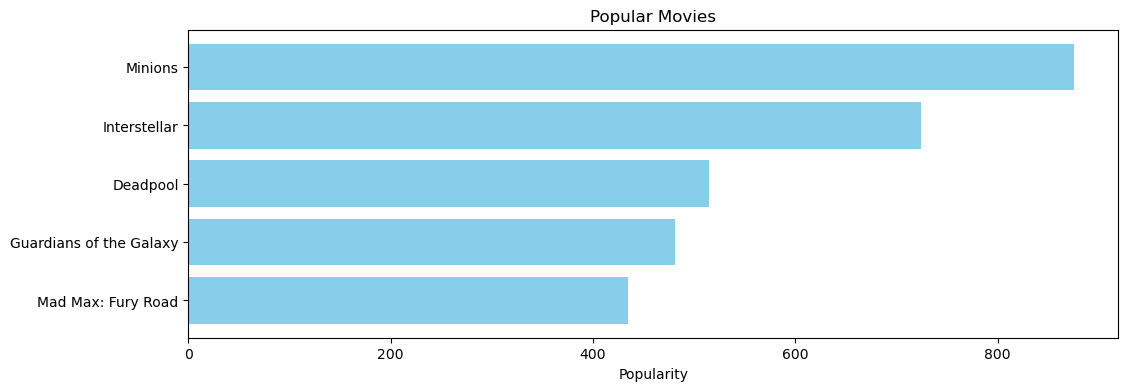

In [20]:
pop= df.sort_values('popularity', ascending=False).head(5)
plt.figure(figsize=(12,4))

plt.barh(pop['title'],pop['popularity'], align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

**Demographic filtering** method is based on how we score each movie, which can come from our subjective perspective. Beside, we can easily see that this method only relies on the majority of users for suggestions. This may not be suitable for specific user groups. This is when we move on to a more refined system - **Content Based Filtering**.

### Content-Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

In content-based systems, that is, based on the content of each item, we need to build a profile for each item. This profile is represented mathematically as a feature vector. In simple cases, the feature vector is directly extracted from the item. For this dataset, I will use `overview` feature.

In [21]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...
1    Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...
2    A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...
3    Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...
4    John Carter is a war-weary, former military captain who's inexplicably transported to the myster...
Name: overview, dtype: object

The most important job in a content-based recommendation system is to build a profile for each item, or we can understand that is to build a feature vector for each item. From these feature vectors, the problem can be reduced to the problem of classifying movies based on similarity from words in the overview.

We need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

**Term Frequency - Inverse Document Frequency (TF-IDF)** is a widely used text classification technique in NLP. It measures how important a word is within a document.Now if you are wondering what is **term frequency** , it is the relative frequency of a word in a document and is given as *(term instances/total instances)*. **Inverse Document Frequency** is the relative count of documents containing the term is given as *log(number of documents/documents with term)*. The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

First, we need a litlle preprocessing. Since there are a few empty overviews, we need to handle these missing value by *filling ' '*. Beside, it seem that the overview often have many stop words, which are meaningless when classifying, so we don't have to consider these words.

In [22]:
#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

In [23]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview'])

# Get feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print feature names and TF-IDF matrix
print("Feature Names (Words):", feature_names)
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Feature Names (Words): ['00' '000' '007' ... 'été' 'única' 'über']
TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

$$\text{Cosine Similarity(A, B)} = \frac{A • B} {||A|| * ||B||}$$

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# Print similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.02160533 0.         0.        ]
 [0.         0.         1.         ... 0.01488159 0.         0.        ]
 ...
 [0.         0.02160533 0.01488159 ... 1.         0.01609091 0.00701914]
 [0.         0.         0.         ... 0.01609091 1.         0.01171696]
 [0.         0.         0.         ... 0.00701914 0.01171696 1.        ]]


Great! Now we have the similarity matrix of movies based on `overview` feature. We can use this matrix to define a function check the top 10 most similar with the movie we have by checking top 10 biggest similarities in the row of movie. To make it easy to do this, we can mapping the title of movies with indices dataframe. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [25]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [26]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=similarity_matrix):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the similarity scores of all movies with the given movie
    sim_scores = cosine_sim[idx]

    # Sort the movies based on the similarity scores
    sorted_indices = np.argsort(sim_scores)[::-1]

    # Get the indices of the 10 most similar movies (excluding the movie itself)
    top_indices = sorted_indices[1:11]
    
    # Return the top 10 most similar movies
    return df['title'].iloc[top_indices]

In [27]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [28]:
import tkinter as tk
from tkinter import messagebox

# Create the Tkinter window
window = tk.Tk()
window.title("Movie Recommendation System")

# Function to handle the search
def search_movie():
    # Get the input from the entry box
    movie_title = entry.get()

    # Check if the movie title is empty
    if not movie_title:
        messagebox.showerror("Error", "Please enter a movie title.")
        return

    # Try to get recommendations
    try:
        recommendations = get_recommendations(movie_title)
        result_text.config(state="normal")
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, recommendations)
        result_text.config(state="disabled")
    except KeyError:
        messagebox.showerror("Error", "Movie not found in the database.")

# Create the search box
label = tk.Label(window, text="Enter a movie title:")
label.pack()

entry = tk.Entry(window, width=50)
entry.pack()

search_button = tk.Button(window, text="Search", command=search_movie)
search_button.pack()

# Display the recommendations
result_label = tk.Label(window, text="Top 10 Recommendations:")
result_label.pack()

result_text = tk.Text(window, height=10, width=50)
result_text.config(state="disabled")
result_text.pack()

# Run the Tkinter event loop
window.mainloop()

Beside using overview, we can use *genres, cast or keyword* to build a content-based recommendation system

From the cast, crew and keywords features, we need to extract the three most important actors, genres and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists (JSON string), we need to convert it into a safe and usable structure. First we need to preprocess to get the required information from these features

In [29]:
# Create a copy dataframe to avoid conflict
copy_df = df.copy()

In [30]:
import json

# Parse the stringified features into their corresponding python objects
# Function to extract names from JSON strings
def extract_names(json_str):
    try:
        data_list = json.loads(json_str)
        names = [entry["name"] for entry in data_list]
        if len(names) > 3:
            names = names[:3]
        return names
    except:
        return []

In [31]:
# Apply function to our features
features = ['cast', 'keywords', 'genres']
for feature in features:
    copy_df[feature] = copy_df[feature].apply(extract_names)

In [32]:
copy_df[['title', 'cast', 'keywords', 'genres']].head()

,title,cast,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [33]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]

In [34]:
# Apply function to our features
features = ['cast', 'keywords' , 'genres']

for feature in features:
    copy_df[feature] = copy_df[feature].apply(clean_data)

We also need to merge these features into a feature to feed our vectorizer so that it will use all the information in these 3 features to recommend movie

In [35]:
def create_metadata(x):
    return ' '. join(x['keywords']) +  ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['genres'])
copy_df['soup'] = copy_df.apply(create_metadata, axis=1)

In [36]:
copy_df[['title', 'cast', 'keywords', 'genres', 'soup']].head()

,title,cast,keywords,genres,soup
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]","[action, adventure, fantasy]",cultureclash future spacewar samworthington zoesaldana sigourneyweaver action adventure fantasy
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]",ocean drugabuse exoticisland johnnydepp orlandobloom keiraknightley adventure fantasy action
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]","[action, adventure, crime]",spy basedonnovel secretagent danielcraig christophwaltz léaseydoux action adventure crime
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[dccomics, crimefighter, terrorist]","[action, crime, drama]",dccomics crimefighter terrorist christianbale michaelcaine garyoldman action crime drama
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]",basedonnovel mars medallion taylorkitsch lynncollins samanthamorton action adventure sciencefiction


Now let's vectorize the data for counting similarities

In [37]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(copy_df['soup'])

# Vocabulary
vocab = count_vectorizer.get_feature_names_out()

# Transformed matrix
print(count_matrix.toarray())

# Vocabulary mapping
print(vocab)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['17thcentury' '18thcentury' '1910s' ... 'юлияснигирь' '卧底肥妈' '绝地奶霸']


In [38]:
similarity_matrix_2 = cosine_similarity(count_matrix)

# Print similarity matrix
print("Similarity Matrix:")
print(similarity_matrix_2)

Similarity Matrix:
[[1.         0.33333333 0.22222222 ... 0.         0.         0.        ]
 [0.33333333 1.         0.22222222 ... 0.         0.         0.        ]
 [0.22222222 0.22222222 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [39]:
get_recommendations('The Dark Knight Rises', similarity_matrix_2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
1253               Kiss of Death
1149             American Hustle
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

### Colaborative filtering

In **Content-based Recommendation Systems**, we got acquainted with a simple product recommendation system based on the characteristics of each item. The characteristic of Content-based Recommendation Systems is that building a model for each user does not depend on other users but depends on the profile of each item. This has the advantage of saving memory and computation time. At the same time, the system is capable of taking advantage of the specific information of each item as described in the description of each item. This description can be generated by the supplier or collected by asking users to tag items. Building a feature vector for each item often involves **Natural Language Processing (NLP)** techniques.

The above method has two basic disadvantages. First, when building a model for a single user, Content-based systems cannot take advantage of information from other users. This information is often very useful because users' purchasing behavior is often grouped into a few simple groups; If we know the purchasing behavior of some users in the group, the system should infer the behavior of the remaining users. Second, we don't always have a description for each item. Asking users to add tags is even more difficult because not everyone is willing to do it; Or do it but it will be a personal trend. NLP algorithms are also more complicated in that they have to handle words that are close in meaning, abbreviated, misspelled, or written in different languages.

The above disadvantages can be solved with **Collaborative Filtering (CF)**. In this article, I will present to you a CF method called **Neighborhood-based Collaborative Filtering (NBCF)**.

The basic idea of NBCF is to determine the level of interest of a user in an item based on other users that are similar to this user. The similarity between users can be determined through the level of interest of these users in other items known to the system. For example, A and B both like the movie The Avenger, meaning they both rate this movie 5 stars. We already know that A also likes The Avenger 2, so it's likely that B also likes this movie.

Determining the level of interest of each user in an item based on the level of interest of similar users in that item is also called **User-user collaborative filtering**. There is another approach that is said to work more effectively: **Item-item collaborative filtering**. In this approach, instead of identifying user similarities, the system will identify similar items. From there, the system suggests items that are similar to items that the user has a high level of interest in.

Since the dataset we used before did not have userId (which is necessary for collaborative filtering), so let's load another dataset.

In [40]:
ratings = pd.read_csv('IMDB Movie Data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


Let's have a first look about data type

In [41]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


irst, we need to decide which information to use in building the anime recommendation system. Obviously, the columns `userId`, `movieId`, and `rating` are essential to perform this task. As for the column `timestamp`, these columns can still have value in practice when building a recommendation model. However, for simplicity, we will temporarily set aside these two columns here.

Based on 3 columns, I need to create a 2D NumPy matrix named `ratings_mat`. In this matrix, the number of rows represents the number of users, while the number of columns represents the number of movies. So, `ratings_mat[i, j]` will represent the rating that `user_i` has given to `movie_j`. "For movie series that the user has not rated, the value will be 'NaN'."

In [42]:
# Convert dataframe to numpy array for using 
user_ratings = ratings.to_numpy()

In [43]:
# Convert to integer to avoid trouble when create matrix
user_ratings = user_ratings.astype('uint64')
user_ratings[:5] # Look at the first 5 lines

array([[         1,         16,          4, 1217897793],
       [         1,         24,          1, 1217895807],
       [         1,         32,          4, 1217896246],
       [         1,         47,          4, 1217896556],
       [         1,         50,          4, 1217896523]], dtype=uint64)

In [44]:
print('User id  - min & max:', 
      user_ratings[:, 0].min(), '&', user_ratings[:, 0].max()) 
print('Anime id - min & max:', 
      user_ratings[:, 1].min(), '&', user_ratings[:, 1].max()) 

User id  - min & max: 1 & 668
Anime id - min & max: 1 & 149532


The ID of user and movie should fit with the indices of matrix, so let's minus them with 1

In [45]:
user_ratings[:, 0] = user_ratings[:, 0] - 1
user_ratings[:, 1] = user_ratings[:, 1] - 1

It's time we create the rating matrix

In [46]:
# Create empty rating matrix
ratings_mat = np.empty((668, 149532))

# Fill the rating matrix with Nan
ratings_mat[:] = np.nan

# Fill the rating matrix with indices from user_rating's user ID and user ID, value from user_rating's ratings 
ratings_mat[user_ratings[:,0], user_ratings[:,1]] = user_ratings[:,2]

# Replace all values of 0 with Nan
ratings_mat = np.where(ratings_mat == 0, np.nan, ratings_mat)

In [47]:
ratings_mat[:10]

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 5., nan,  2., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 5., nan,  4., ..., nan, nan, nan],
       [nan, nan,  3., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

It would be much simpler if we used algorithms supported by other libraries. However, I want to practice using the Numpy library. Therefore, I will build a simple movie recommendation system from scratch using the provided data, utilizing only Numpy library.

In my opinion, there are two fundamental tasks in a movie recommendation system:

- First, we need to predict the ratings for movies that a user hasn't reviewed or watched yet.
- Second, we need to provide recommendations to users based on the top-rated movies that have been predicted.

It seems that the second task will become much simpler if we can accomplish the first task. One of the simplest ways to tackle task 1 is by computing the similarity between users and using this similarity to make predictions. However, there are some considerations to keep in mind. It's not feasible to compute similarity between all users at once, as it might lead to memory issues (even if you have enough memory, my computer is quite limited in that regard :<). One way to address this issue is to 
use **SVD (Singular Value Decomposition)** to reduce dimension in the rating matrix since the size is big.

First let's predict the `nan` values in `ratings_matrix` using **Knn (K-nearest neighbor)** 

In [48]:
def handle_missing_values(ratings_mat, impute_method="knn", k=None):
    if k is None:
        raise ValueError("kNN imputation requires specifying 'k' as an additional argument.")

    ratings_mat_filled = ratings_mat.copy()

    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=k)
    ratings_mat_filled = imputer.fit_transform(ratings_mat)

    return ratings_mat_filled

In [49]:
# Handle missing values by replacing with mean or using imputation techniques
ratings_mat_filled = handle_missing_values(ratings_mat, k=3)
ratings_mat_filled[:10]

array([[3.        , 4.33333333, 2.33333333, ..., 3.        , 4.        ,
        4.        ],
       [5.        , 3.66666667, 2.        , ..., 3.        , 4.        ,
        4.        ],
       [3.        , 3.66666667, 3.66666667, ..., 3.        , 4.        ,
        4.        ],
       ...,
       [5.        , 3.33333333, 4.        , ..., 3.        , 4.        ,
        4.        ],
       [3.66666667, 3.66666667, 3.        , ..., 3.        , 4.        ,
        4.        ],
       [3.66666667, 3.66666667, 3.66666667, ..., 3.        , 4.        ,
        4.        ]])

The Singular Value Decomposition (SVD) of an mxn matrix A is given by:

$$ A = U \Sigma V^T \$$

Where:
- U is an mxm orthogonal matrix.
- Sigma is an mxn diagonal matrix with non-negative real numbers on the diagonal, known as the singular values of A.
- V^T  is the transpose of an nxn orthogonal matrix.

In detail,  U , Sigma , and V^T can be expressed as:

$$\ U = [u_1 \,|\, u_2 \,|\, \ldots \,|\, u_m] \ $$

$$ \Sigma = \begin{bmatrix}
\sigma_1 & 0 & \ldots & 0 \\
0 & \sigma_2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \sigma_n \\
0 & 0 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & 0 \\
\end{bmatrix} $$

$$ V^T = \begin{bmatrix}
v_1^T \\
v_2^T \\
\vdots \\
v_n^T \\
\end{bmatrix} $$

Where  u_i  and  v_i  are the left and right singular vectors of  A , respectively, corresponding to the singular value sigma_i .

The matrices  U  and  V  are orthonormal, meaning $$U^TU = I$$ and $$ V^TV = I$$ , where  I  is the identity matrix.


**How is SVD meaning in recommdation system?**

If the matrix M is rank r, then we can prove that the matrices M^T.M and M.M^T are both rank r. In singular value decomposition (the reduced SVD), the columns of matrix U are eigenvectors of M^T M and the rows of matrix V^T are eigenvectors of M.M^T. What's interesting is that M M^T and M^T M are potentially in different size (because matrix M can be non-square shape), but they have the same set of eigenvalues, which are the square of values on the diagonal of Σ.

This is why the result of singular value decomposition can reveal a lot about the matrix M.

Imagine in this dataset we collected some movie reviews such that movie are rows and people are columns, and the entries are the ratings that a person gave to a movie. In that case, M.M^T would be a table of person-to-person similarity, which the entries would mean the sum of the ratings one person gave match with another one. Similarly M^T.M would be a table of ,movie-to-movie similarity which entries are the sum of the ratings received match with that received by another book. What can be the hidden connection between people and books? That could be the genre, or the author, or something of similar nature.

In [50]:
U, Sigma, VT = np.linalg.svd(ratings_mat_filled, full_matrices=False)

I will follow this flow to build a simple item-item recommendation system:
   - Step 1: Calculate the `similarities` array to show the similarity between each movies based on users' ratings using `Cosine Similarity`.
   - Step 2: Sort by most similar and return the top N results with the idea quite same as the function `get_recommendation` above.
   - Step 3: Print the top N recommended movies with the function `get_recommendation_cf`

In [51]:
# Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, title, top_n=10):
    index = indices[title]  # Get the index of the movie that matches the title
    movie_row = data[index, :].reshape(1, -1)  # Reshape to make it a row vector
    similarity_matrix = cosine_similarity(movie_row, data)
    similarity_scores = similarity_matrix.flatten()  # Flatten the matrix to 1D array
    sort_indices = np.argsort(-similarity_scores)  # Sort in descending order
    return sort_indices[1:top_n] # Get the indices of the 10 most similar movies (excluding the movie itself)
    #return df['title'].iloc[top_indices]

In [52]:
def get_recommendation_cf(list_of_indices):
    for i in list_of_indices:
        print(df['title'].iloc[i])

In [53]:
#k-principal components to represent movies
k = 50
sliced = VT.T[:, :k] # representative data
title = 'Avatar'
list_of_indices = top_cosine_similarity(sliced, title )
print("You may liked one from this list (Based on users' votes): \n")
get_recommendation_cf(list_of_indices)

You may liked one from this list (Based on users' votes): 

Steel
Predators
Entrapment
Machete
The Legend of Hercules
The Fan
Moonrise Kingdom
The Jacket
The Sentinel


## Conclusion

This is all my first study about recommendation system using **Demographic filtering, Content-based filtering, Collaborative filtering** and apply to make some simple recommendation system.  While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. These models was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from:

   - [Kaggle](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook)
    
   - https://machinelearningmastery.com/using-singular-value-decomposition-to-build-a-recommender-system/
    
   - https://machinelearningcoban.com/2017/05/24/collaborativefiltering/
   
   - https://machinelearningcoban.com/2017/05/17/contentbasedrecommendersys/
   
   - https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf
    